# TIME SERIES - motif and discords discovery 
Motifs and discords are identified using the Matrix Profile technique

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance 
from tslearn.piecewise import PiecewiseAggregateApproximation, SymbolicAggregateApproximation
from matrixprofile import *

In [433]:
X_train = np.load(r'RavdessAudioOnlyNumpy__X_train.npy')

Both motifs and discords are extracted from individual time series rather than from a set of time series. For this reason, instead of working with the entire dataset, we extract some time series.

The extraction criterion is as follows: after performing clustering, N centroids have been identified.

Instead of conducting the analysis on the centroids, which are essentially fictitious time series that do not belong to the dataset, it was decided to identify which real time series are most similar to these. Indices of the time series:

<br>
Centroid 0 -->  Nearest Time Series Index = 298 <br>
Centroid 1 -->  Nearest Time Series Index = 1161 <br>
Centroid 2 -->  Nearest Time Series Index = 249 

In [2]:
X_train_smoothed_scaled = np.load(r'X_train_smoothed_scaled.npy')

In [4]:
# original TS - not approximated 

ts0 = X_train_smoothed_scaled[298]
ts1 = X_train_smoothed_scaled[1161]
ts2 = X_train_smoothed_scaled[249]

In [33]:
# X_dft = np.load(r'X_train_dft.npy')
# ts_dft = X_dft[298]  # ts_dft0

## Several attempts aiming at identifying the correct window for matrix profile
We conducted many different experiments using various window sizes, encompassing a range of small,
medium, and large sizes. The matrix profile was computed for each window size, and motifs detected were
evaluated visually, trying to pay particular attention to whether such motifs represented complete patterns or if
they were fragmented. This visual evaluation was complicated by the fact that we were working with the entire
non-approximated time series. However, we recognized that selecting a proper window size is crucial to strike
a balance between capturing meaningful patterns and avoiding over or under representation of motifs. <br>
At the end, we decided that **w = 1000 and w = 600** led to the most significant results

### First time series

In [ ]:
count_nan = np.count_nonzero(np.isnan(ts0))

print("NaN:", count_nan)
ts0t = ts0[:-count_nan]

#### w = 100 

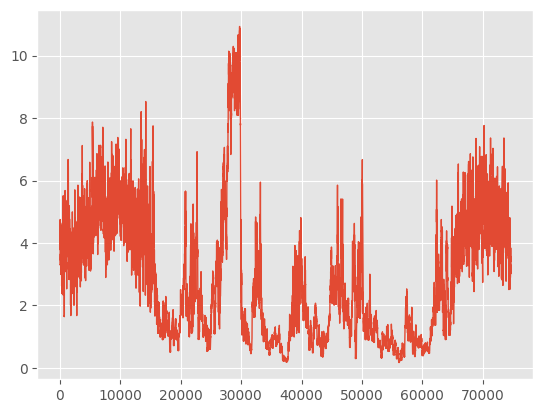

In [344]:
w = 100 
mp, mpi = matrixProfile.stomp(ts0t.squeeze(), 100)

plt.plot(mp, lw = 1)
plt.show()

In [208]:
mo, mod  = motifs.motifs(ts0t.squeeze(), (mp, mpi), max_motifs=5)

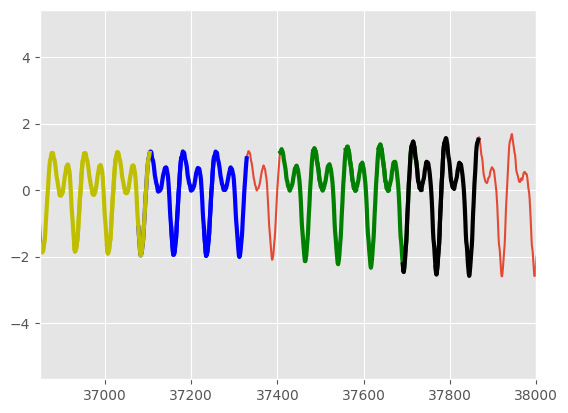

In [348]:
w = 100
plt.plot(ts0t.squeeze())
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts0t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        plt.xlim(36850, 38000)

plt.show()

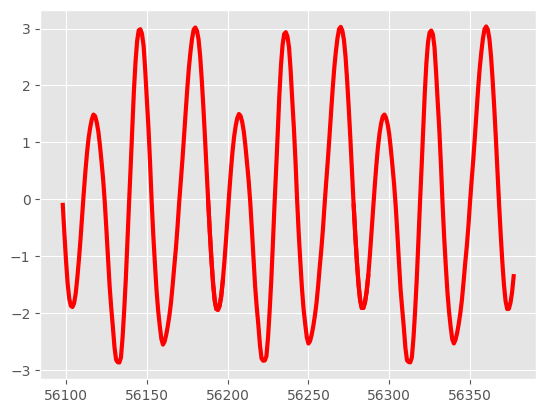

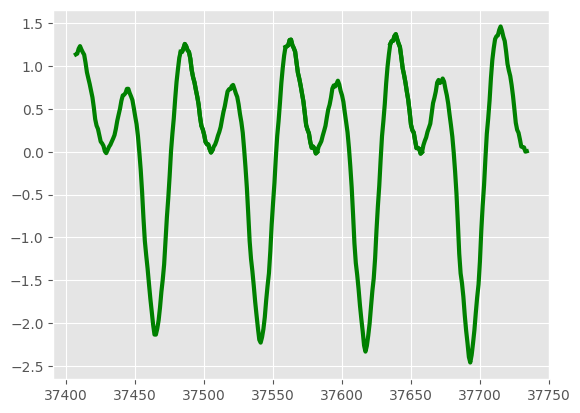

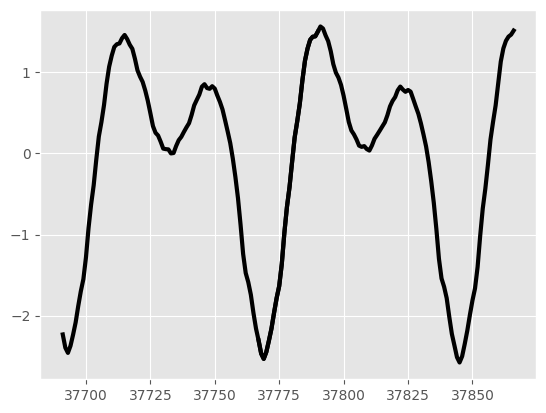

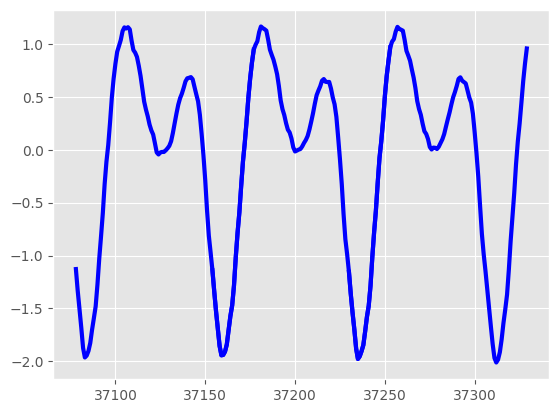

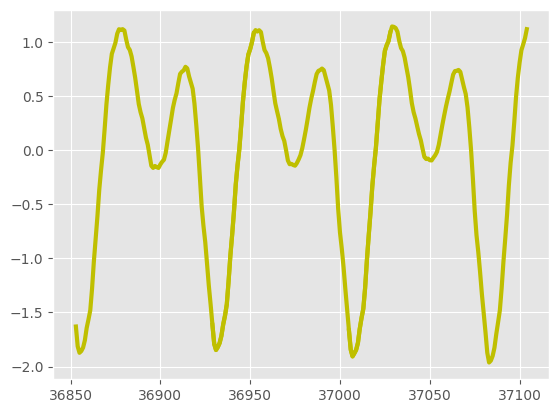

In [210]:
w = 100 
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts0t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

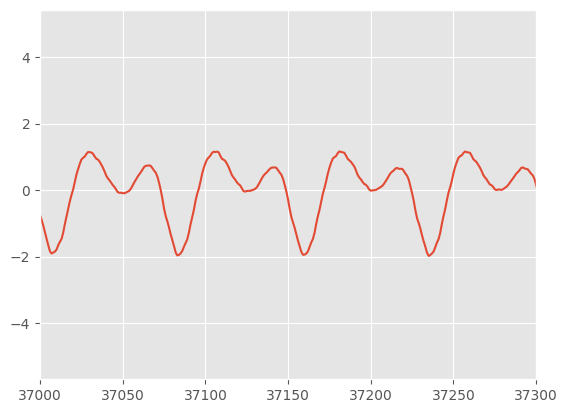

In [220]:
plt.plot(ts0t)
plt.xlim(37000, 37300)
plt.show()

#### w = 500

In [211]:
# w = 500 
mp2, mpi2 = matrixProfile.stomp(ts0t.squeeze(), 500)

#### w = 50

In [212]:
# w = 50 
mp3, mpi3 = matrixProfile.stomp(ts0t.squeeze(), 50)

In [213]:
mo2, mod2  = motifs.motifs(ts0t.squeeze(), (mp2, mpi2), max_motifs=5)

In [214]:
mo3, mod3  = motifs.motifs(ts0t.squeeze(), (mp3, mpi3), max_motifs=5)

#### w = 500

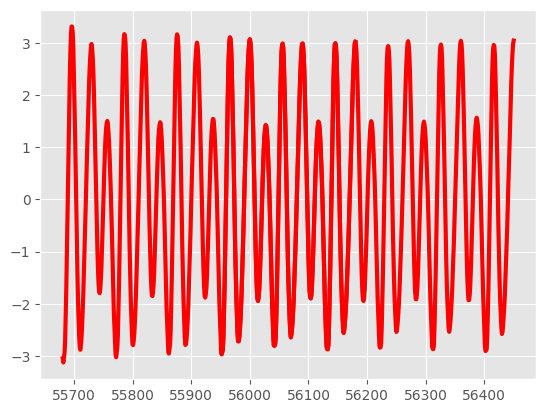

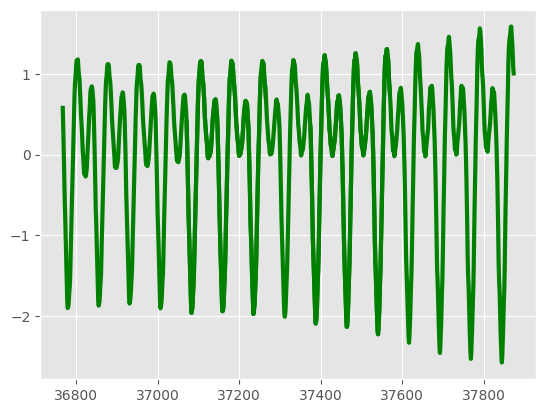

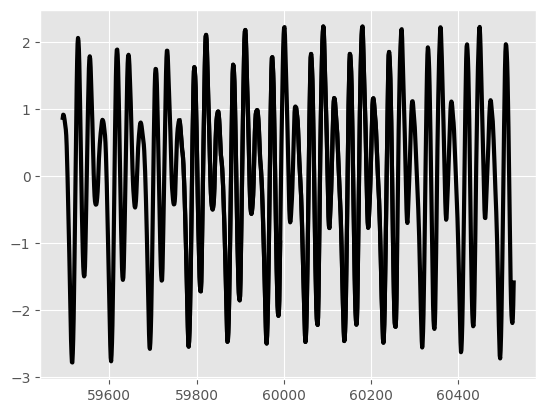

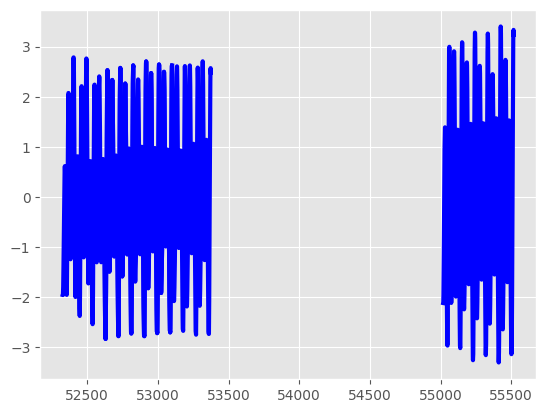

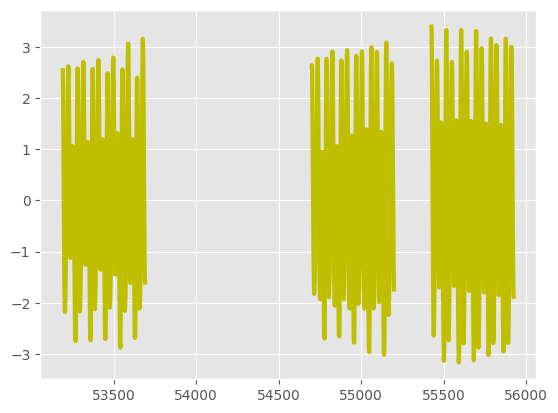

In [215]:
w = 500
colors = ['r', 'g', 'k', 'b', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo2)]
for m, d, c in zip(mo2, mod2, colors):
    for i in m:
        m_shape2 = ts0t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape2, color=c, lw=3)
    plt.show()

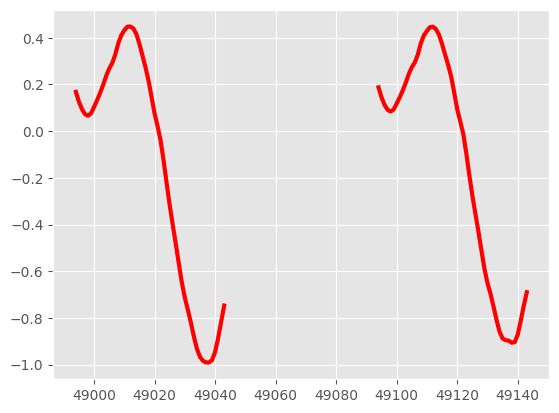

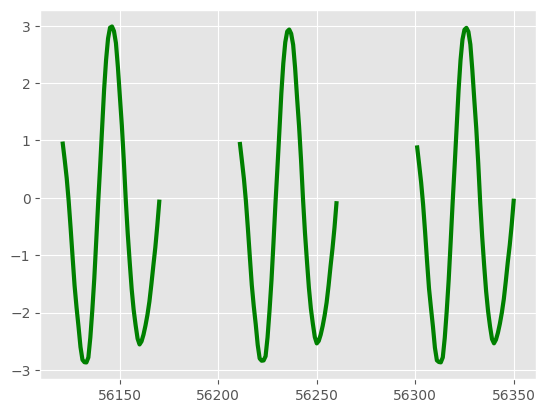

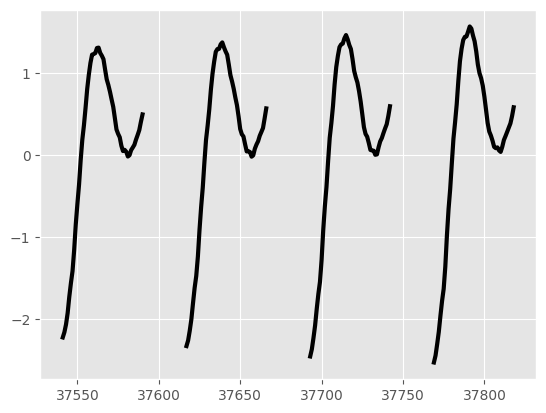

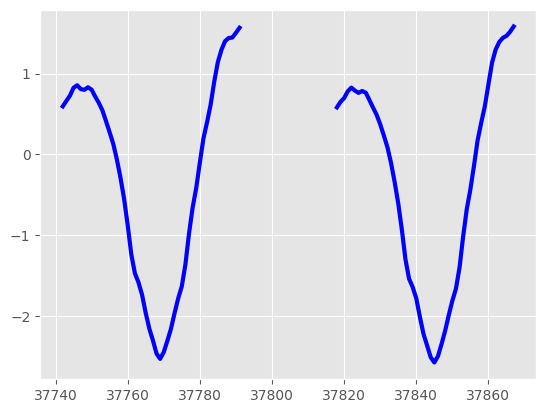

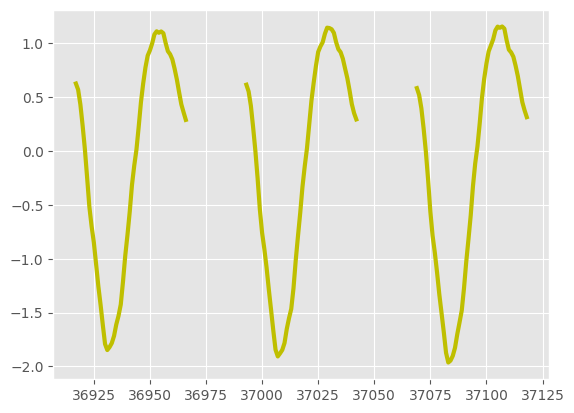

In [216]:
w = 50
colors = ['r', 'g', 'k', 'b', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo3)]
for m, d, c in zip(mo3, mod3, colors):
    for i in m:
        m_shape3 = ts0t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape3, color=c, lw=3)
    plt.show()

#### comparison between w2 = 500 and w3 = 50 

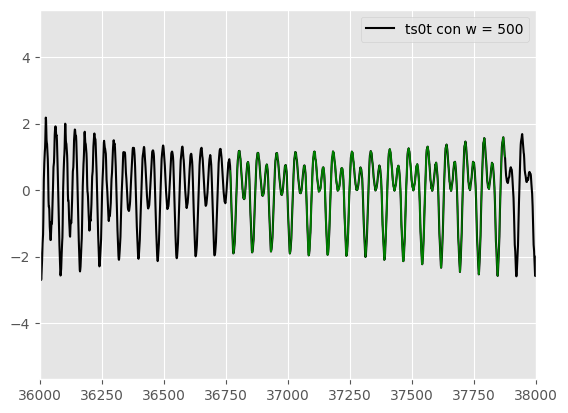

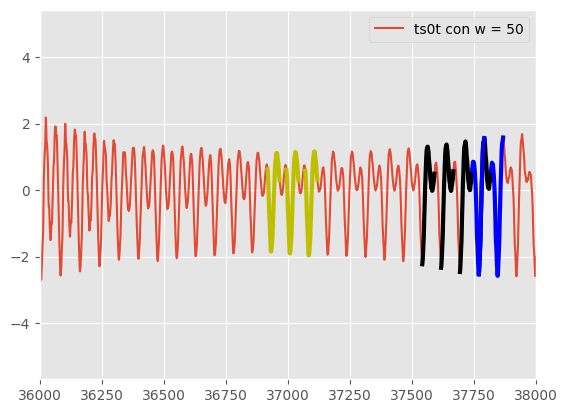

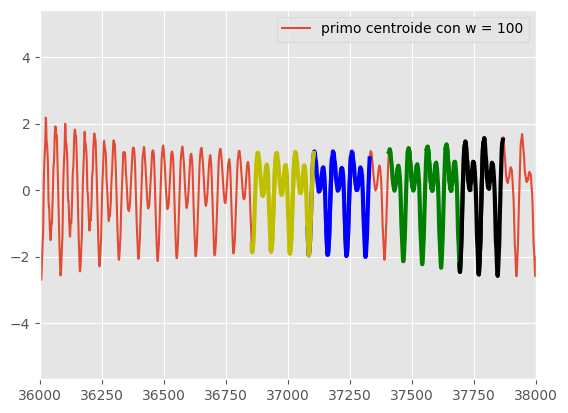

In [508]:
w2 = 500
w3 = 50
plt.plot(ts0t.squeeze(), label = 'ts0t con w = 500', color = 'black')
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo2)]
for m, d, c in zip(mo2, mod2, colors):
    for i in m:
        m_shape2 = ts0t.squeeze()[i:i+w2]
        plt.plot(range(i,i+w2), m_shape2, color=c, lw=1)
        plt.xlim(36000, 38000)
plt.legend()
plt.show()

plt.plot(ts0t.squeeze(), label = 'ts0t con w = 50')
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo3)]
for m, d, c in zip(mo3, mod3, colors):
    for i in m:
        m_shape3 = ts0t.squeeze()[i:i+w3]
        plt.plot(range(i,i+w3), m_shape3, color=c, lw=3)
        plt.xlim(36000, 38000)
plt.legend()
plt.show()

w1 = 100
plt.plot(ts0t.squeeze(), label = 'primo centroide con w = 100')
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape1 = ts0t.squeeze()[i:i+w1]
        plt.plot(range(i,i+w1), m_shape1, color=c, lw=3)
        plt.xlim(36000, 38000)
plt.legend()
plt.show()

#### w = 1000

In [91]:
mp4, mpi4 = matrixProfile.stomp(ts0t.squeeze(), 1000)

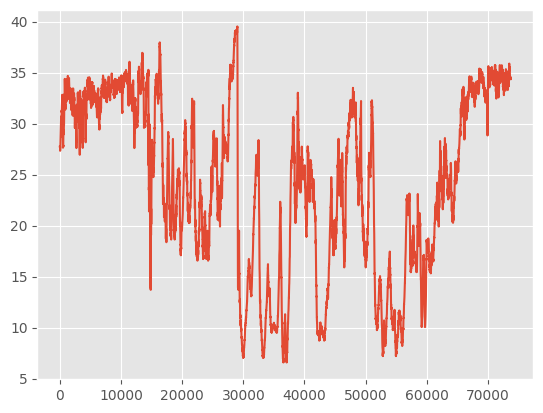

In [360]:
plt.plot(mp4)

(0.0, 10.0)

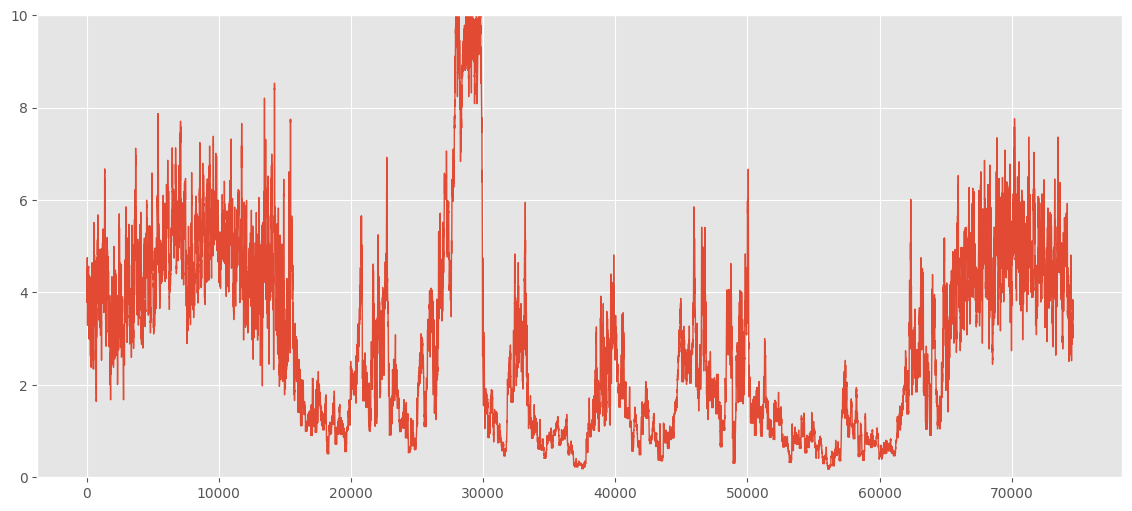

In [271]:
plt.figure(figsize=(14, 6)) 
plt.plot(mp, lw = 1) 
plt.ylim(0,10)

In [92]:
mo4, mod4  = motifs.motifs(ts0t.squeeze(), (mp4, mpi4), max_motifs=6)

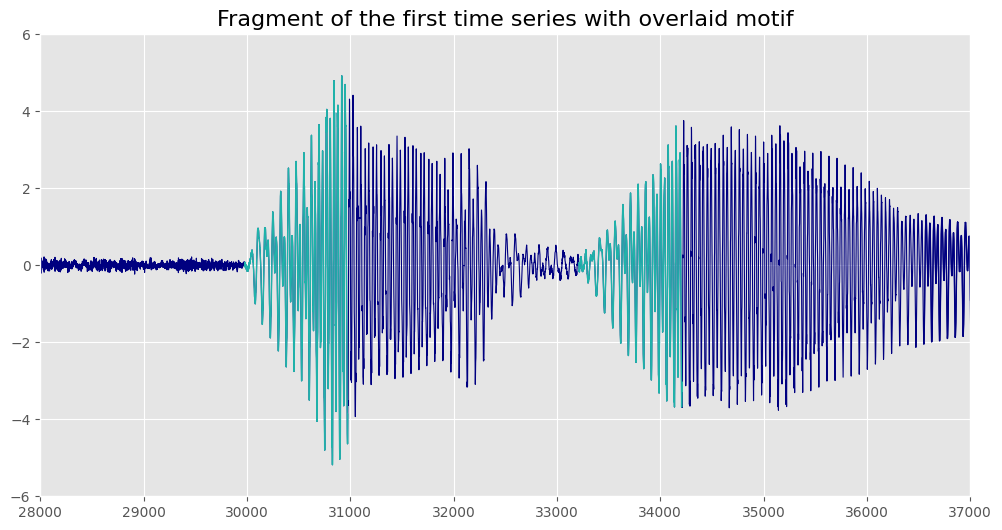

In [536]:
w4 = 1000
plt.figure(figsize=(12, 6))
plt.plot(ts0t.squeeze(), label = 'primo centroide con w = 1000', color='navy', lw = 0.8)
colors = ['navy', 'lightseagreen', 'k', 'b', 'y'][:len(mo4)]
for m, d, c in zip(mo4, mod4, colors):
    for i in m:
        m_shape4 = ts0t.squeeze()[i:i+w4]
        plt.plot(range(i,i+w4), m_shape4, color=c, lw=1)
        plt.xlim(28000, 37000)
        plt.ylim(-6,6)
plt.title('Fragment of the first time series with overlaid motif', size = 16)
plt.show()

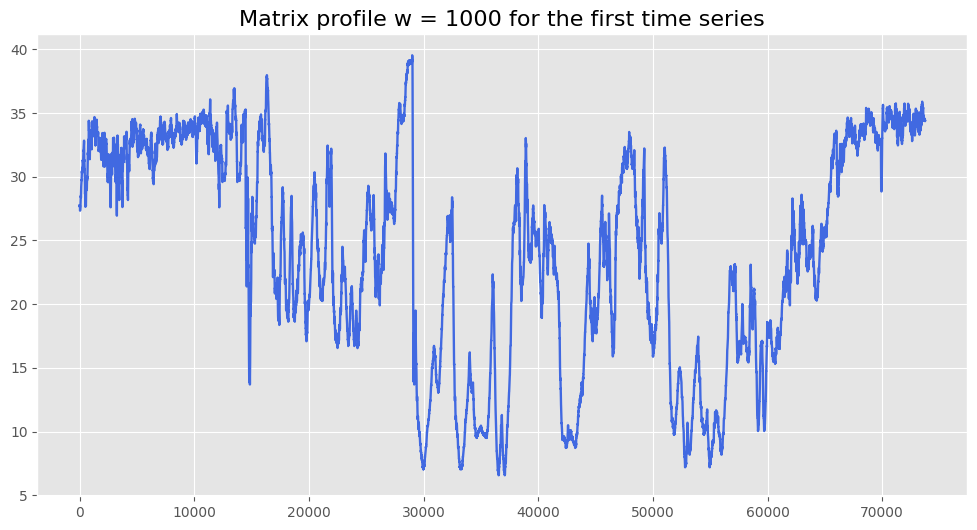

In [537]:
plt.figure(figsize=(12, 6)) 
plt.plot(mp4, lw = 1.7, color = 'royalblue')
plt.title('Matrix profile w = 1000 for the first time series', size = 16)
plt.show()

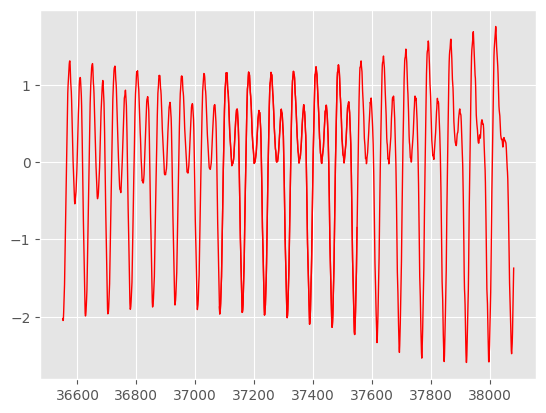

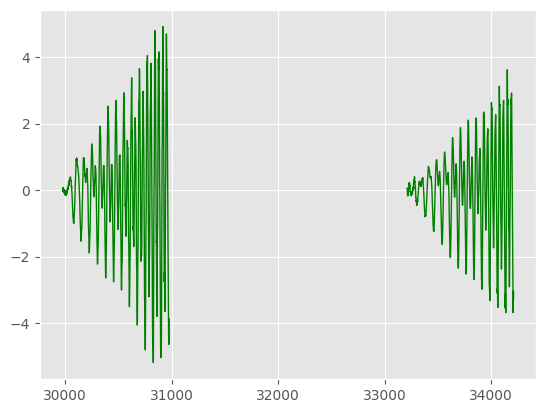

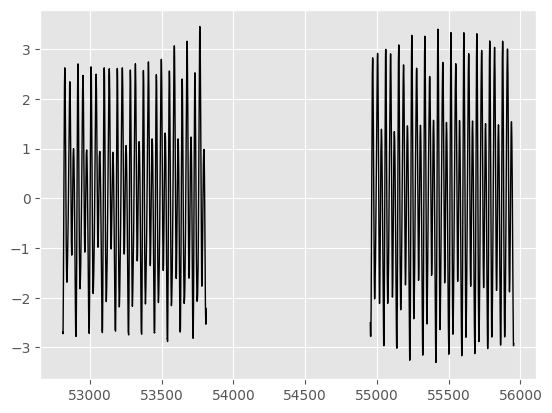

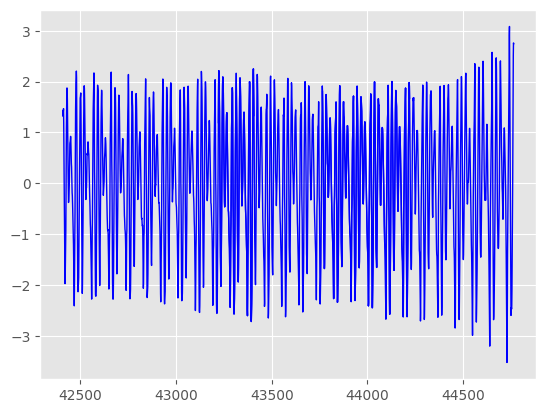

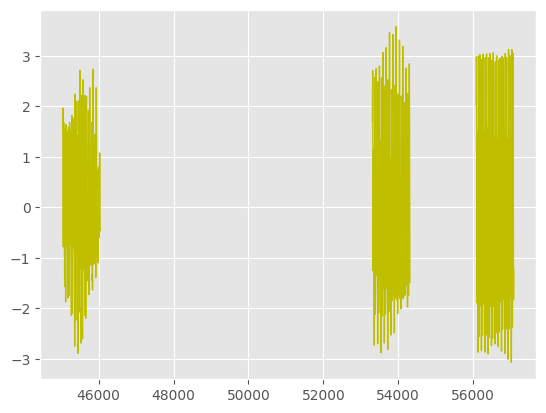

In [231]:
w = 1000
colors = ['r', 'g', 'k', 'b', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo4)]
for m, d, c in zip(mo4, mod4, colors):
    for i in m:
        m_shape4 = ts0t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape4, color=c, lw=1)
    plt.show()

### Second and third time series - same approach 

(5000.0, 35000.0)

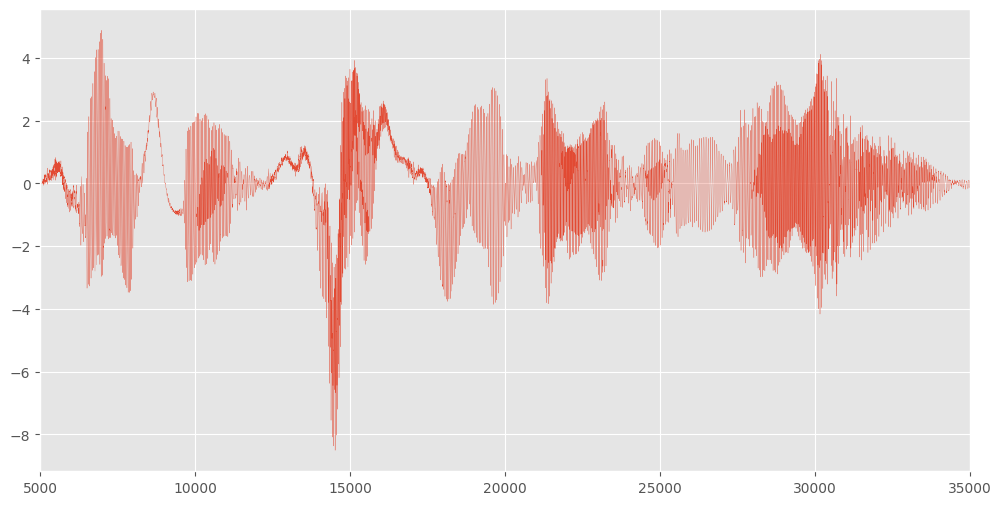

In [278]:
plt.figure(figsize=(12, 6))
plt.plot(ts1, lw = 0.2)
plt.xlim(5000, 35000)

In [99]:
count_nan = np.count_nonzero(np.isnan(ts1))

print("Numero di valori NaN:", count_nan)
ts1t = ts1[:-count_nan]

Numero di valori NaN: 42856


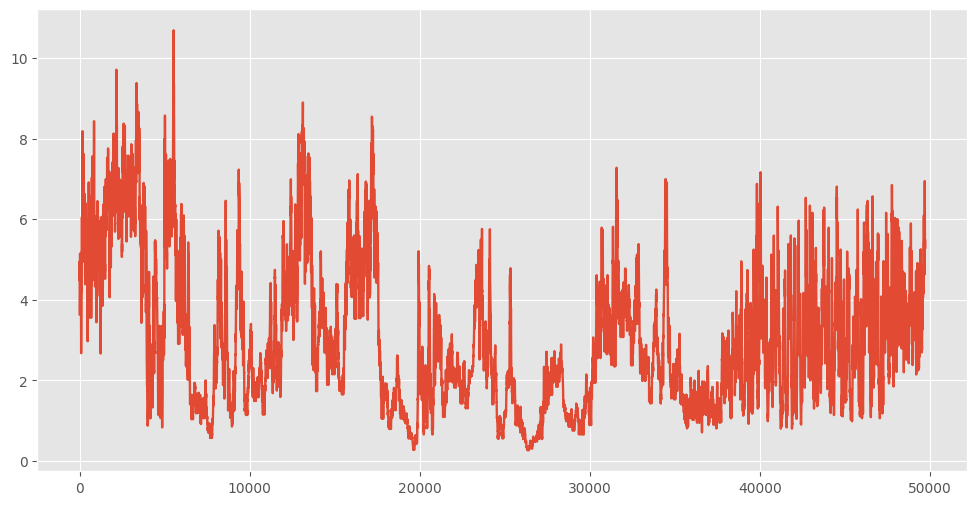

In [518]:
# w = 100 
#mp11, mpi11 = matrixProfile.stomp(ts1t.squeeze(), 100)
plt.figure(figsize=(12, 6))
plt.plot(mp11, lw = 1.7)
plt.show()

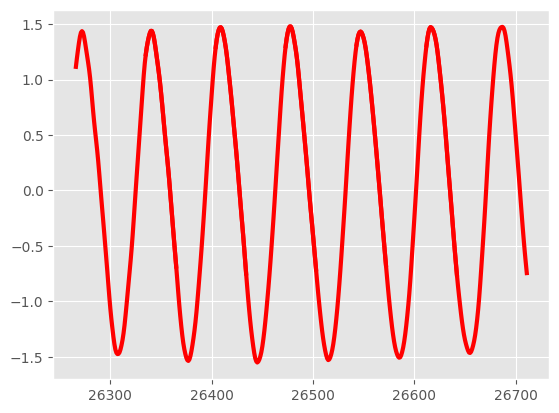

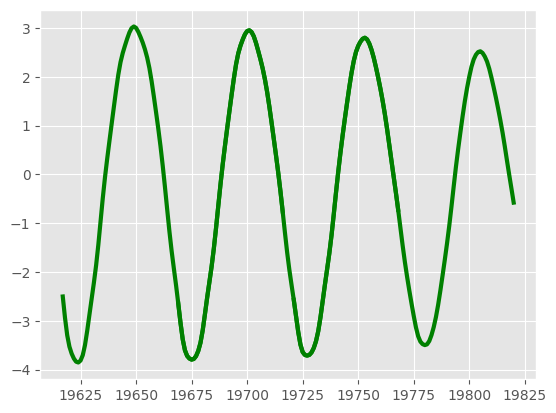

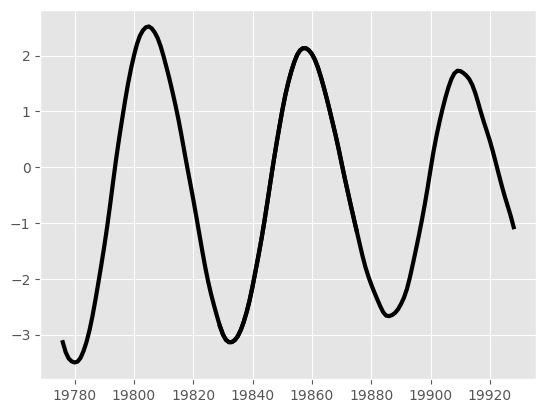

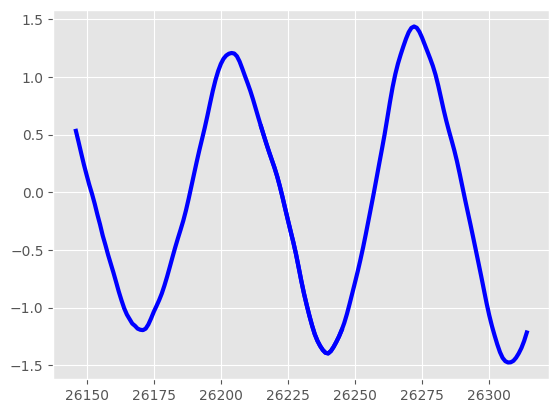

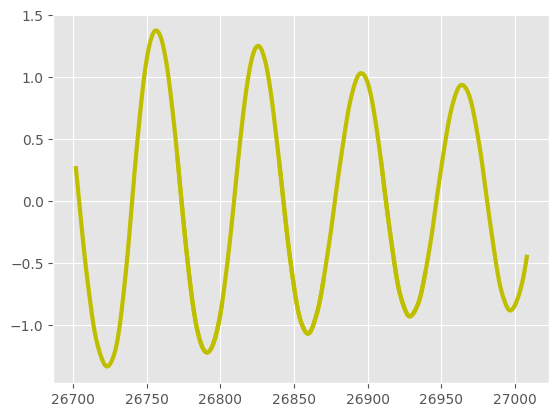

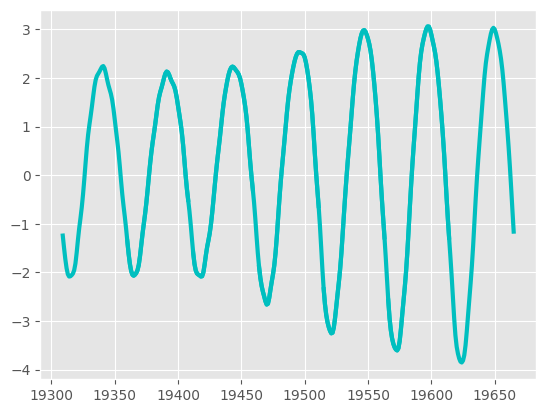

In [286]:
w = 100 
colors = ['r', 'g', 'k', 'b', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo11)]
for m, d, c in zip(mo11, mod11, colors):
    for i in m:
        m_shape = ts1t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

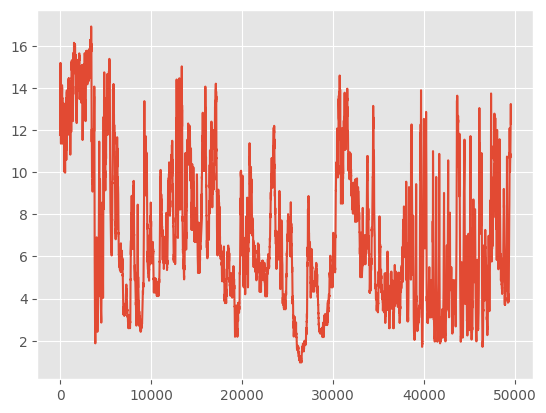

In [502]:
# w = 250
mp12, mpi12 = matrixProfile.stomp(ts1t.squeeze(), 250)

plt.plot(mp12)
plt.show()

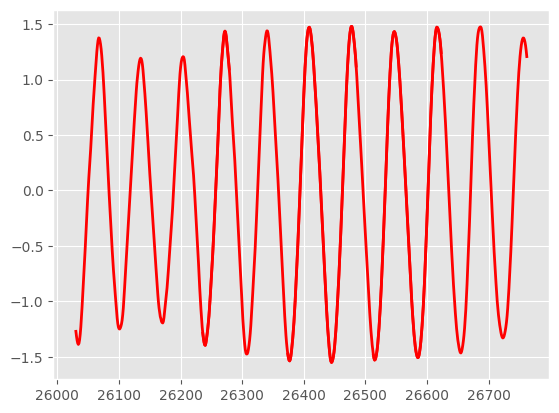

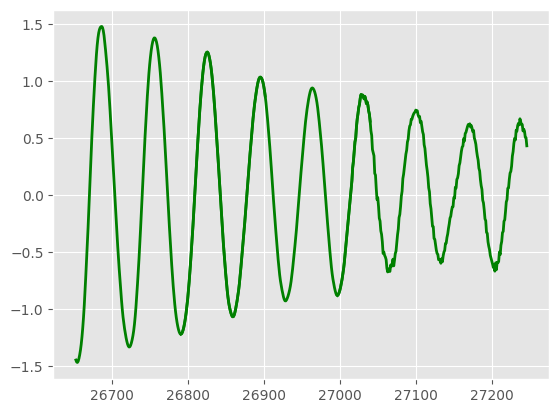

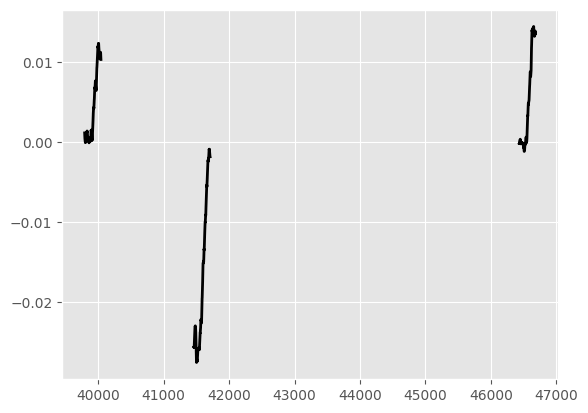

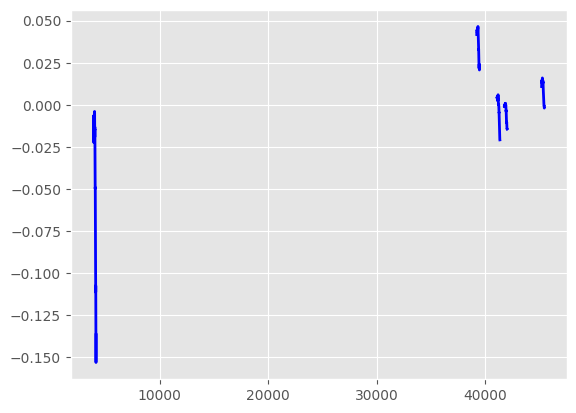

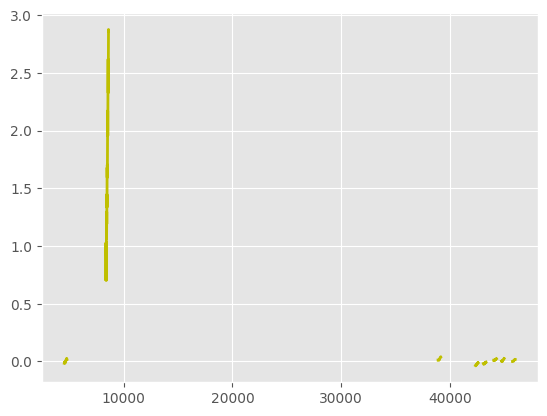

In [538]:
w = 250
mo12, mod12  = motifs.motifs(ts1t.squeeze(), (mp12, mpi12), max_motifs = 5)

colors = ['r', 'g', 'k', 'b', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo12)]
for m, d, c in zip(mo12, mod12, colors):
    for i in m:
        m_shape = ts1t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=2)
    plt.show()

In [ ]:
# w = 80
mp13, mpi13 = matrixProfile.stomp(ts1t.squeeze(), 80)

plt.plot(mp13)
plt.show()

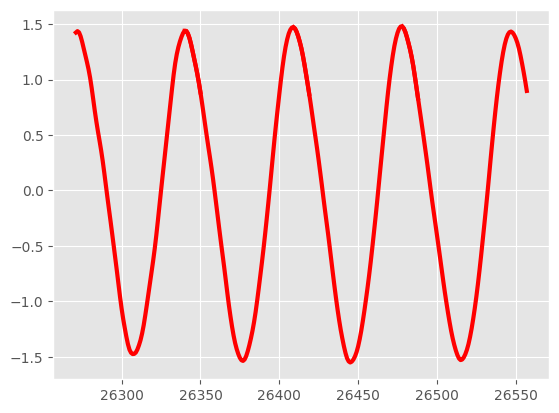

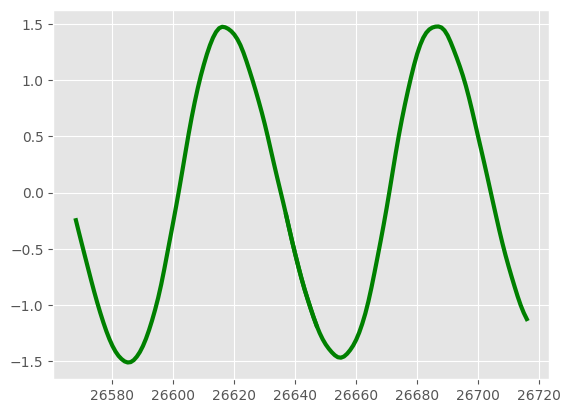

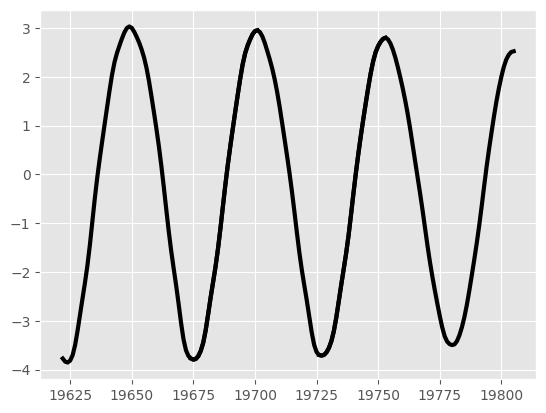

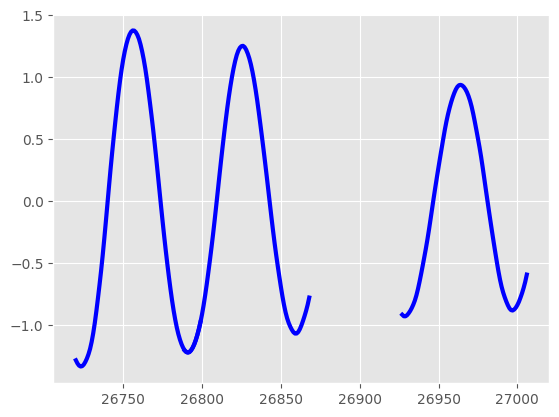

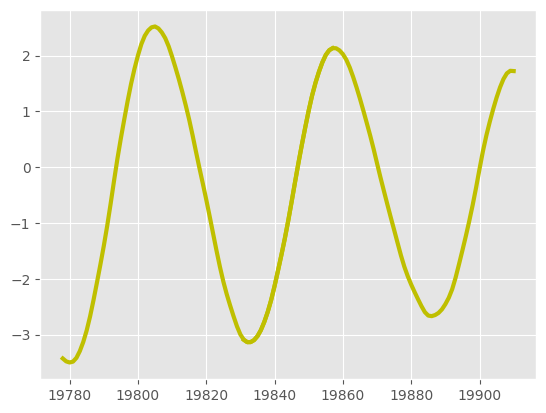

In [540]:
w = 80
mo13, mod13  = motifs.motifs(ts1t.squeeze(), (mp13, mpi13), max_motifs = 5)

colors = ['r', 'g', 'k', 'b', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo13)]
for m, d, c in zip(mo13, mod13, colors):
    for i in m:
        m_shape = ts1t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [131]:
# terza serie storica 
count_nan = np.count_nonzero(np.isnan(ts2))

print("Numero di valori NaN:", count_nan)
ts2t = ts2[:-count_nan]

Numero di valori NaN: 30209


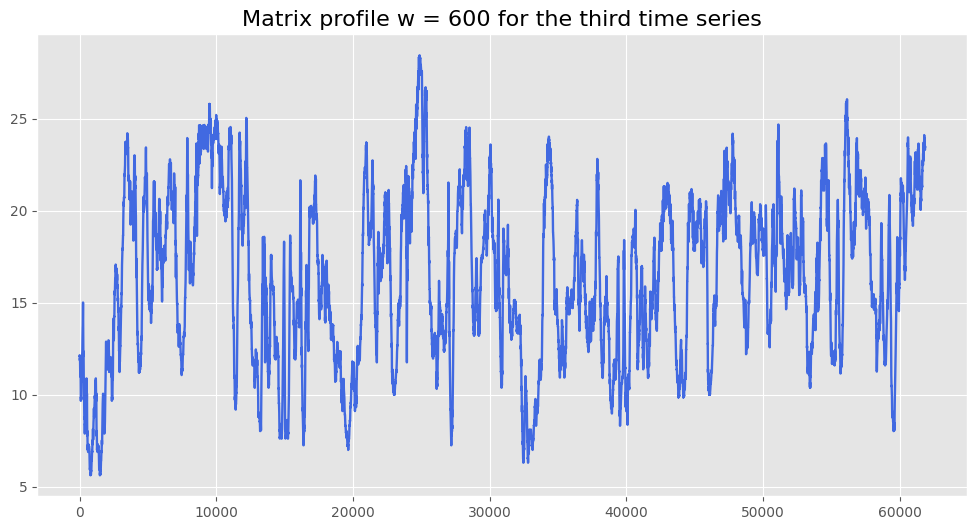

In [549]:
# w = 600
# mp21, mpi21 = matrixProfile.stomp(ts2t.squeeze(), 600)

plt.figure(figsize=(12, 6)) 
plt.plot(mp21, lw = 1.7, color = 'royalblue')
plt.title('Matrix profile w = 600 for the third time series', size = 16)
plt.show()

In [ ]:
w = 600
mo21, mod21  = motifs.motifs(ts2t.squeeze(), (mp21, mpi21), max_motifs = 5)

colors = ['r', 'g', 'k', 'b', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo21)]
for m, d, c in zip(mo21, mod21, colors):
    for i in m:
        m_shape = ts2t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=1)
    plt.show()

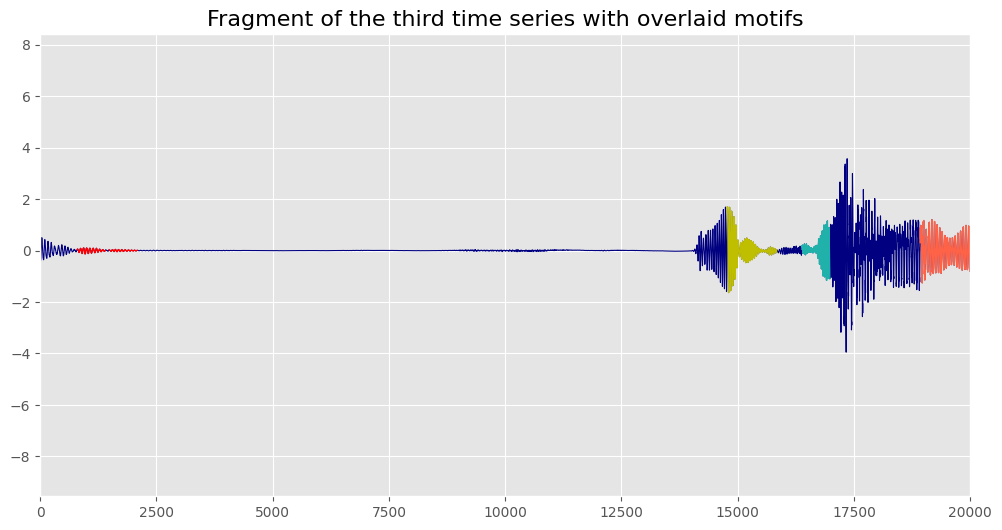

In [551]:
w = 600

plt.figure(figsize=(12, 6))
mo21, mod21  = motifs.motifs(ts2t.squeeze(), (mp21, mpi21), max_motifs = 5)
plt.plot(ts2t.squeeze(), label = 'terzo centroide con w = 600', color='navy', lw = 0.8)
colors = ['r', 'tomato', 'magenta', 'lightseagreen', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo21)]
for m, d, c in zip(mo21, mod21, colors):
    for i in m:
        m_shape = ts2t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=1)
        plt.xlim(0, 20000)
plt.title("Fragment of the third time series with overlaid motifs", size = 16)
plt.show()

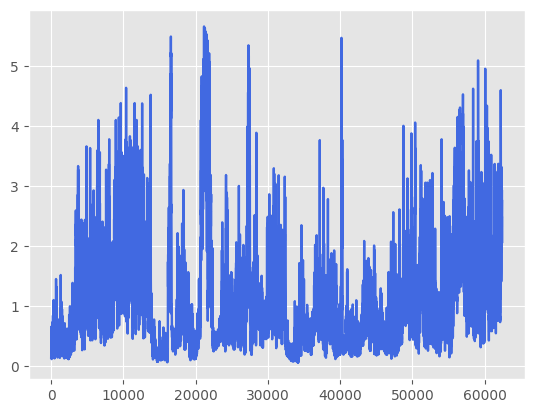

In [519]:
# w = 35
mp22, mpi22 = matrixProfile.stomp(ts2t.squeeze(), 35)

plt.plot(mp22, lw = 1.7, color = 'royalblue')
plt.show()

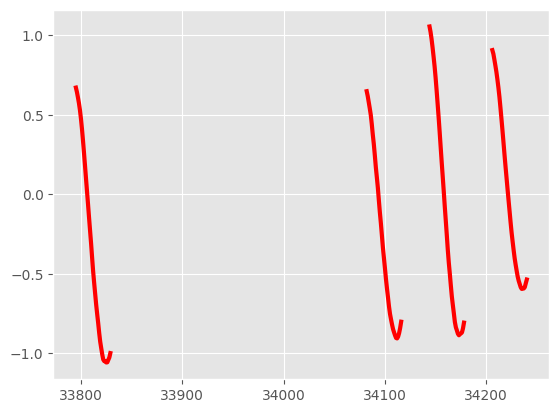

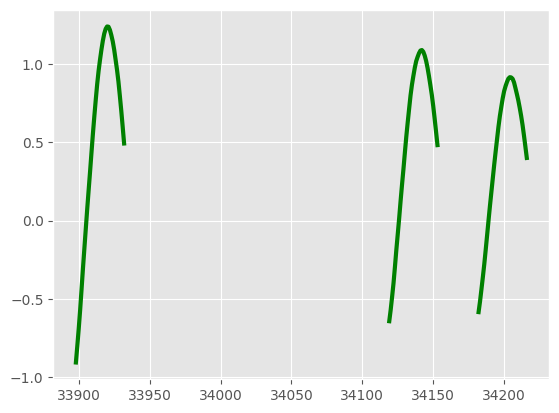

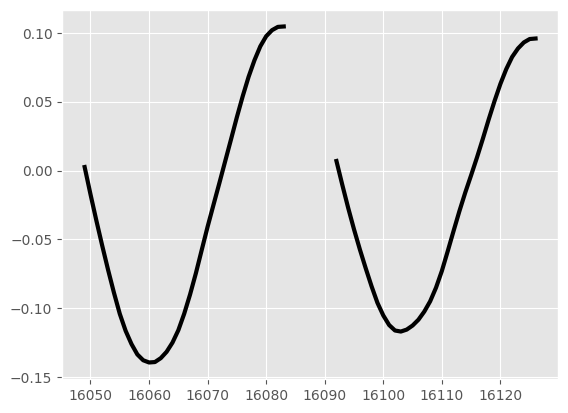

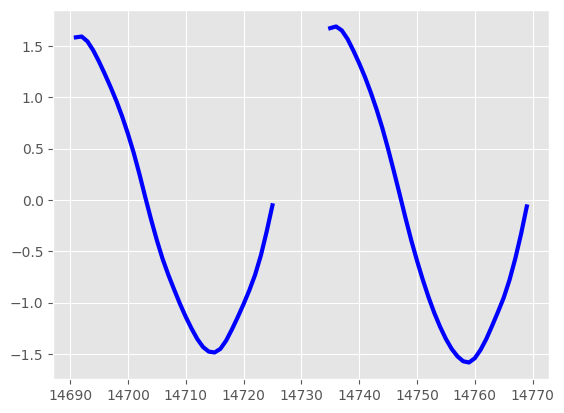

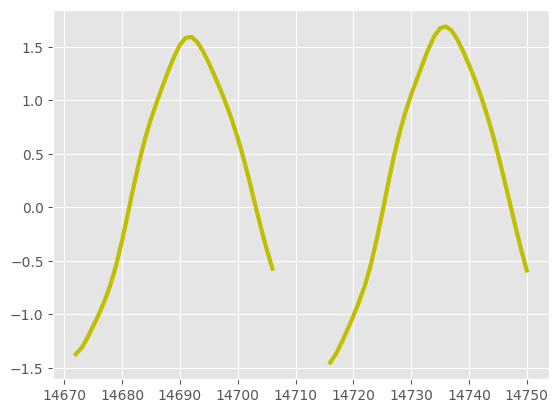

In [520]:
w = 35
mo22, mod22  = motifs.motifs(ts2t.squeeze(), (mp22, mpi22), max_motifs = 5)

colors = ['r', 'g', 'k', 'b', 'y', 'c', 'm', 'w', 'orange', 'purple'][:len(mo22)]
for m, d, c in zip(mo22, mod22, colors):
    for i in m:
        m_shape = ts2t.squeeze()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

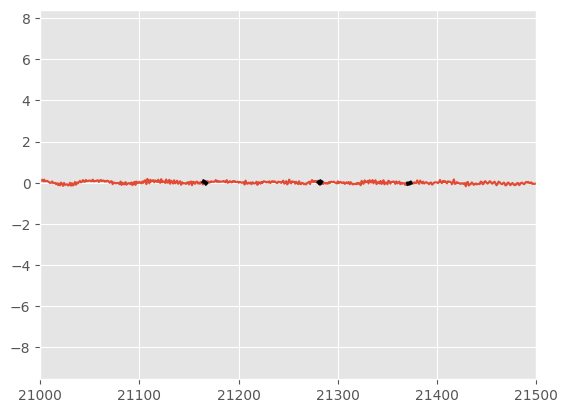

In [529]:
w = 35
plt.plot(ts2t.squeeze())
anoms22= discords(mp22, ex_zone=10, k=3)
for a in (anoms22):
    a_shape = ts2t.squeeze()[a:a+3]
    plt.plot(range(a, a+3), a_shape, color='k', lw=3)
    plt.xlim(21000, 21500)





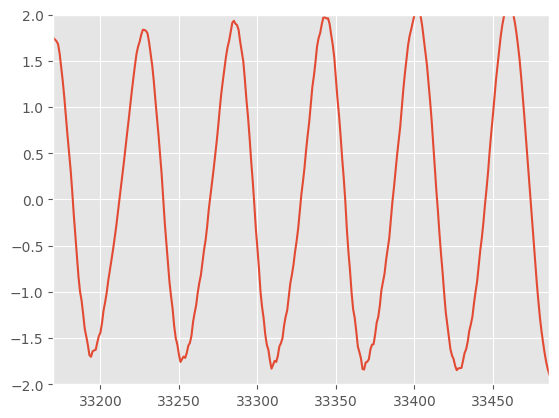

In [163]:
plt.plot(ts2t.squeeze())
plt.xlim(mo22[1][0]-20, mo22[1][2]+180)
plt.ylim(-2, +2)
plt.show()

## Motifs/discords on DFT approximation

In [362]:
# tst_dft è la serie storica più vicina al primo centroide, ovvero X_dft[298]
# tst_dft1 è la più vicina al secondo centroide, ovvero X_dft[1161]
# tst_dft2 è la più vicina al terzo centroice, ovvero X_dft[249]

In [3]:
X_dft = np.load(r'X_train_dft.npy')
ts_dft1 = X_dft[249]

In [ ]:
w = 4
plt.plot(ts_dft1.squeeze(), label = 'ts originale')


mp9, mpi9 = matrixProfile.stomp(ts_dft1, w) 
mo9, mod9  = motifs.motifs(ts_dft1, (mp9, mpi9), max_motifs = 5)


m_shape9=0

colors = ['r', 'g', 'k', 'b', 'y'][:len(mo9)]
for m, d, c in zip(mo9, mod9, colors):
    for i in m:
        m_shape9 = ts_dft1[i:(i+w)]
        plt.plot(range(i,i+w), m_shape9, color=c, lw=3)
 


plt.show()

In [ ]:
mot1 = ts_dft1[20:27]
shap800 = X_dft[650][53:60]
dist1 = distance.euclidean(mot1, shap800)

shap800 = X_dft[800][40:45]

In [21]:
from scipy.spatial import distance

In [26]:
dist1 = distance.euclidean(mot1, shap800)

In [414]:
anoms_dft1 = discords(mp9, ex_zone=3, k=3)

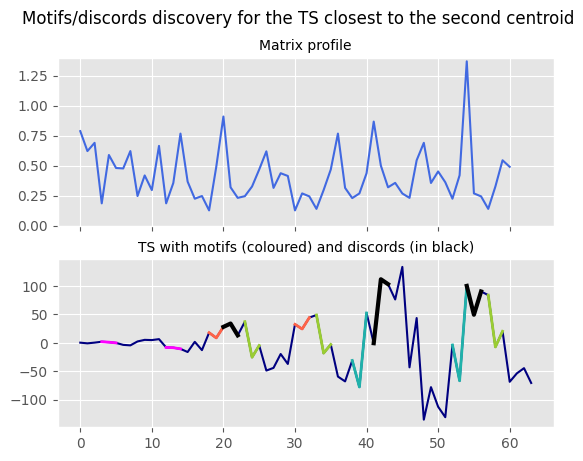

In [420]:
# PLOT MATRIX PROFILE + TS + MOTIFS di ts_dft1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)


ax1.plot(mp9, 'royalblue')
ax1.set_ylim(0, 1.4)
#ax1.set_ylabel('')
# ax1.tick_params('y', colors='g')
ax1.set_title('Matrix profile', size = 10)

ax2.plot()
ax2.plot(ts_dft1.squeeze(), 'navy')
colors = ['tomato', 'yellowgreen', 'magenta', 'lightseagreen', 'gold'][:len(mo9)]
for m, d, c in zip(mo9, mod9, colors):
    for i in m:
        m_shape9 = ts_dft1[i:(i+w)]
        ax2.plot(range(i,i+w), m_shape9, color=c, lw=2)

for a in (anoms_dft1):
    a_shape = ts_dft1[a:a+3]
    ax2.plot(range(a, a+3), a_shape, color='k', lw=3)

ax2.set_title('TS with motifs (coloured) and discords (in black)', size= 10)
fig.suptitle('Motifs/discords discovery for the TS closest to the second centroid', size=12)
plt.show()

In [ ]:
ts_dft2 = X_dft[249]


mp_dft2, mpi_dft2 = matrixProfile.stomp(ts_dft2, w) 
mo_dft2, mod_dft2  = motifs.motifs(ts_dft2, (mp_dft2, mpi_dft2), max_motifs = 5)


In [407]:
from matrixprofile.discords import discords
anoms_dft2 = discords(mp_dft2, ex_zone=3, k=3)

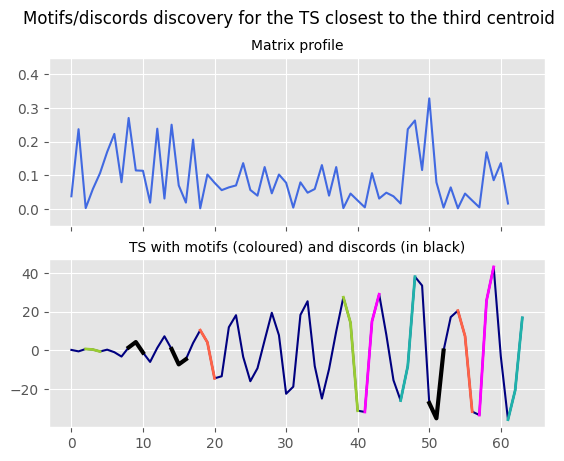

In [419]:
# PLOT MATRIX PROFILE + TS + MOTIFS di ts_dft2
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)


ax1.plot(mp_dft2, 'royalblue', label = 'matrix profile')
ax1.set_ylim(-0.05, 0.45)
ax1.set_title('Matrix profile', size= 10)

ax2.plot()
colors = ['tomato', 'yellowgreen', 'magenta', 'lightseagreen', 'gold'][:len(mo_dft2)]
ax2.plot(ts_dft2.squeeze(), 'navy')

for m, d, c in zip(mo_dft2, mod_dft2, colors):
    for i in m:
        m_shape = ts_dft2[i:(i+w)]
        ax2.plot(range(i,i+w), m_shape, color=c, lw=2)


for a in (anoms_dft2):
    a_shape = ts_dft2[a:a+w]
    ax2.plot(range(a, a+w), a_shape, color='k', lw=3)


ax2.set_title('TS with motifs (coloured) and discords (in black)', size= 10)

fig.suptitle('Motifs/discords discovery for the TS closest to the third centroid', size=12)

plt.show()

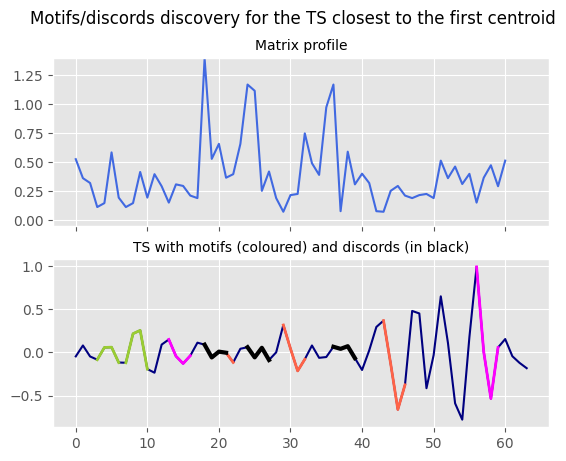

In [431]:
w = 4
mp_dft, mpi_dft = matrixProfile.stomp(ts_dft, w) 
mo_dft, mod_dft  = motifs.motifs(ts_dft2, (mp_dft, mpi_dft), max_motifs = 5)

anoms_dft = discords(mp_dft, ex_zone=3, k=3)


# PLOT MATRIX PROFILE + TS + MOTIFS di ts_dft
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)


ax1.plot(mp_dft, 'royalblue', label = 'matrix profile')
ax1.set_ylim(-0.05, 1.4)
ax1.set_title('Matrix profile', size= 10)

ax2.plot()
colors = ['tomato', 'yellowgreen', 'magenta', 'lightseagreen', 'gold'][:len(mo_dft2)]
ax2.plot(ts_dft.squeeze(), 'navy')

for m, d, c in zip(mo_dft, mod_dft, colors):
    for i in m:
        m_shape = ts_dft[i:(i+w)]
        ax2.plot(range(i,i+w), m_shape, color=c, lw=2)


for a in (anoms_dft):
    a_shape = ts_dft[a:a+w]
    ax2.plot(range(a, a+w), a_shape, color='k', lw=3)


ax2.set_title('TS with motifs (coloured) and discords (in black)', size= 10)

fig.suptitle('Motifs/discords discovery for the TS closest to the first centroid', size=12)

plt.show()

## Final attempt: we're still looking for the best w but as a function of seconds 

In [ ]:
# 0.25 secondi --> wt25 = 16000/4
# 0.5 secondi --> wt05 = 16000/2
# 1 secondo --> wt1 = 16000

In [460]:
wt25 = int(16000/4)
wt05 = int(16000/2)
wt1 = 16000

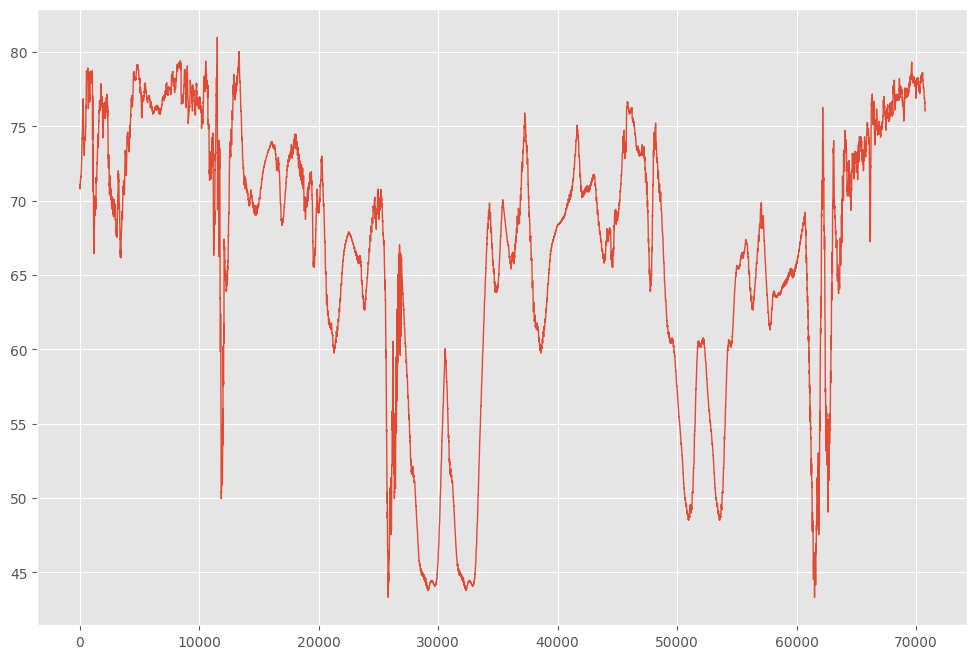

In [466]:
# centroide idx 0 con w = un quarto di secondo
mp025, mpi025 = matrixProfile.stomp(ts0t.squeeze(), wt25)
plt.figure(figsize=(12, 8))
plt.plot(mp025, lw = 1)
plt.show()

In [462]:
mo025, mod025  = motifs.motifs(ts0t.squeeze(), (mp025, mpi025), max_motifs=3)

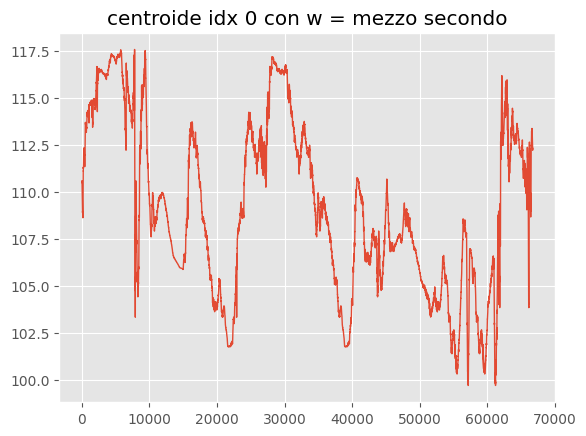

In [463]:
# centroide idx 0 con w = mezzo secondo
mp005, mpi005 = matrixProfile.stomp(ts0t.squeeze(), wt05)
mo005, mod005 = motifs.motifs(ts0t.squeeze(), (mp005, mpi005), max_motifs=3)

plt.plot(mp005, lw = 1)
plt.title('centroide idx 0 con w = mezzo secondo')
plt.show()

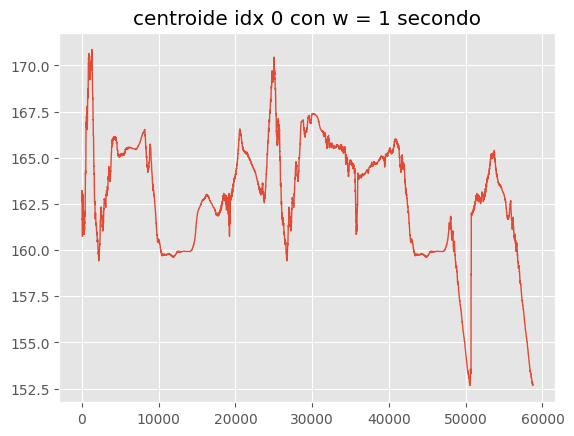

In [464]:
# centroide idx 0 con w = 1 secondo
mp01, mpi01 = matrixProfile.stomp(ts0t.squeeze(), wt1)
mo01, mod01 = motifs.motifs(ts0t.squeeze(), (mp01, mpi01), max_motifs=3)

plt.plot(mp01, lw = 1)
plt.title('centroide idx 0 con w = 1 secondo')
plt.show()

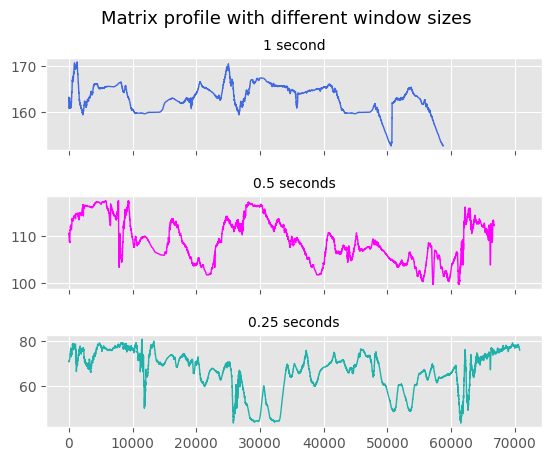

In [483]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(mp01, lw = 1, color = "royalblue", label = "1 sec")
ax1.set_title("1 second", size = 10)
ax2.plot(mp005, lw = 1, color = "magenta", label = "0.5 sec")
ax2.set_title("0.5 seconds", size = 10)
ax3.plot(mp025, lw = 1, color = 'lightseagreen', label = "0.25 sec")
ax3.set_title("0.25 seconds", size = 10)
plt.suptitle('Matrix profile with different window sizes', size = 13)

plt.subplots_adjust(hspace=0.5)  # Aggiungi spazio verticale tra i subplot
plt.show()